In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
iris = load_iris()
print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [51]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
variety = iris.target
data = data[['sepal length (cm)', 'sepal width (cm)']]
data.head(20)

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, variety, test_size=0.25)

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [54]:
lda = LinearDiscriminantAnalysis()

In [55]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [56]:
lda.predict(X_test)

array([0, 0, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 0,
       2, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 1, 0, 0, 2, 1])

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy_score(y_test, lda.predict(X_test))

0.7105263157894737

In [57]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [58]:
result

,0,1
0,0,0
1,0,0
2,1,2
3,0,0
4,2,1
5,1,2
6,1,1
7,1,1
8,1,2
9,2,1


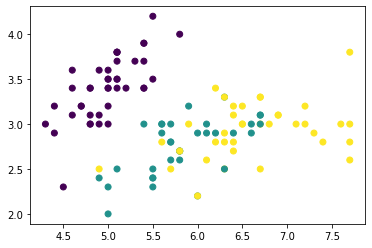

In [59]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

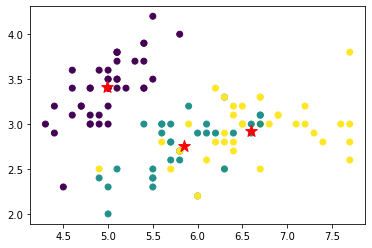

In [65]:
# сам scatter plot
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)



In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
X_train = StandardScaler()

In [68]:

X_scaled = X_train.fit_transform(X_test)

In [69]:
from sklearn.cluster import KMeans

In [70]:
kmeans = KMeans(n_clusters=2)

In [71]:
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

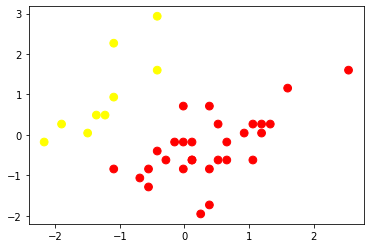

In [72]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)